In [3]:
# scratch code to get atmsopheric forcing .nc files

from datetime import datetime

import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import pygrib
from pydap.client import open_url


In [4]:
# here is one way using opendap to get nomads data using pydap
# with this method the data is not downloaded directly, initially

# nam_nest is at 3 hr resolution, for 2.5 days
# 0.03 deg horizontal resolution
nam_nest = "https://nomads.ncep.noaa.gov/dods/nam/nam20240617/nam_conusnest_00z"

# nam_1hr is at 1 hr resolution, for 1.5 days
# 0.11 deg horizontal resolution
nam_1hr = "https://nomads.ncep.noaa.gov/dods/nam/nam20240617/nam_1hr_00z"

# hires_fv3 is at 1 hr resolution, for 2.5 days
# 0.05 deg horizontal resolution
hires_fv3 = "https://nomads.ncep.noaa.gov/dods/hiresw/hiresw20240617/hiresw_conusfv3_00z"

# hrrr is at 1 hr resolution, for 2 days
# 0.03 deg horizontal resolution 
hrrr = "https://nomads.ncep.noaa.gov/dods/hrrr/hrrr20240617/hrrr_sfc.t00z"

# gfs is at 1 hr resolution, for 5 days
# 0.25 deg horizontal resolution
gfs = "https://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr/gfs20240617/gfs_0p25_1hr_00z"


In [5]:
# to download all times, lats, lons, this would do it!
atm_name = nam_nest
dataset = open_url(atm_name)
# open_url is sometimes slow, and this block of code can be fast (1s), med (6s), or slow (>15s)

time  = dataset['time'] # ???
ln = dataset['lon'] # deg
lt = dataset['lat'] # deg
Pres = dataset['pressfc'] # at surface, pa
Temp = dataset['tmpsfc'] # at surface, K
Hum  = dataset['rh2m'] # at 2 meters, %
U    = dataset['ugrd10m'] # at 10 meters, m/s
V    = dataset['vgrd10m'] # at 10 meters, m/s
Rain = dataset['pratesfc'] # at surface, kg/m2/s
Swd  = dataset['dswrfsfc'] # downward short-wave at surface, W/m2
Swu  = dataset['uswrfsfc'] # upward short-wave at surface, W/m2
Lwd  = dataset['dlwrfsfc'] # downward long-wave at surface, W/m2
Lwu  = dataset['ulwrfsfc'] # upward long-wave at surface, W/m2


In [6]:
# here we find the indices of the data we want for LV1
ln_min = -124.5
ln_max = -115
lt_min = 28
lt_max = 37
Ln0 = ln[:]
Lt0 = lt[:]
iln = np.where( (Ln0>=ln_min)*(Ln0<=ln_max) ) # the lon indices where we want data
ilt = np.where( (Lt0>=lt_min)*(Lt0<=lt_max) ) # the lat indices where we want data


In [8]:
pres2 = Pres[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]] # indexing looks bad but works
t = pres2.time[:].data
lon = pres2.lon[:].data
lat = pres2.lat[:].data
pres = pres2.array[:,:,:].data

# we will get the other data directly
temp = Temp.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
hum = Hum.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
u = U.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
v = V.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
rain = Rain.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
swd = Swd.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
swu = Swu.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
lwd = Lwd.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data
lwu = Lwu.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data

#pres3 = Pres.array[:,ilt[0][0]:ilt[0][-1],iln[0][0]:iln[0][-1]].data


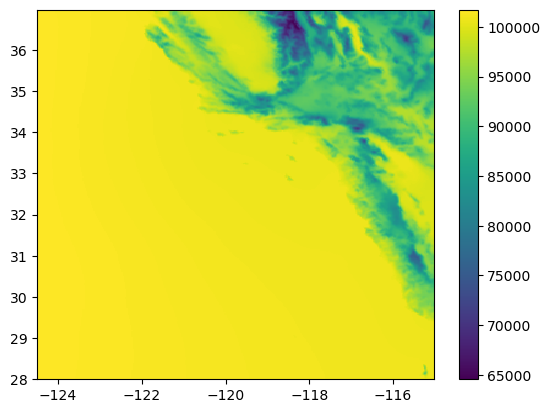

In [9]:
# check the pressure
plt.pcolor(lon,lat,pres[0,:,:])
plt.colorbar()


In [ ]:
sys.path.append('/opt/homebrew/Cellar/nceplibs-g2c/1.9.0/lib')

fn_nam5k = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/nam.t00z.conusnest.hiresf00.tm00-2.grib2'
fn_nomad=fn_nam5k
#print(fn_nomad)
#fn_nomad=url+fn_nam5km
print(fn_nomad)